# Classification of iris flowers from sepal and petal dimensions

The aim is to classify iris flowers among three species (setosa, versicolor, or virginica) from measurements of sepals and petals' length and width.

The iris data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.

The central goal here is to design a model that makes useful classifications for new flowers or, in other words, one which exhibits good generalization.

This is a classification project, since the variable to be predicted is categorical (setosa, versicolor, or virginica).

The goal here is to model the probabilities of class membership, conditioned on the flower features.

# import necessary packages


In [6]:
# import the necessary packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# data set

In [7]:
# Load the dataset from the csv file using pandas
os.chdir('E:/pandas')
dataset=pd.read_csv("iris_flowers.csv")

In [8]:
#start exploring the dataset 
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,iris_setosa
1,4.9,3.0,1.4,0.2,iris_setosa
2,4.7,3.2,1.3,0.2,iris_setosa
3,4.6,3.1,1.5,0.2,iris_setosa
4,5.0,3.6,1.4,0.2,iris_setosa


In [9]:
dataset.columns

Index(['sepal_length', 'sepal_width', 'petal_length', ' petal_width', 'class'], dtype='object')

In [10]:
#print shape of data
dataset.shape

(150, 5)

In [11]:
#get info about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
 petal_width    150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
#separate input and output
x=dataset.iloc[:,[0,1,2,3]]

In [14]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
x=dataset.iloc[:,[0,1,2,3]].values

In [16]:
y=dataset.iloc[:,4]

In [17]:
y.head()

0    iris_setosa
1    iris_setosa
2    iris_setosa
3    iris_setosa
4    iris_setosa
Name: class, dtype: object

In [18]:
y=dataset.iloc[:,4].values

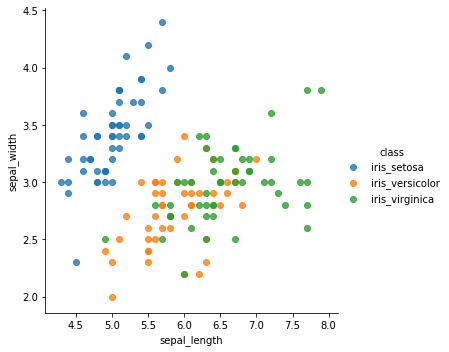

In [4]:
sns.lmplot(x='sepal_length',y='sepal_width',data=dataset,fit_reg=False,hue='class')

# Preprocessing Data

The sklearn.preprocessing package provides several common utility functions and transformer classes to change raw feature vectors into a representation that is more suitable for the downstream estimators.

The preprocessing module further provides a utility class StandardScaler that implements the Transformer API to compute the mean and standard deviation on a training set so as to be able to later reapply the same transformation on the testing set. 

Label Encoding:

Label encoding is a simple and straight forward approach. This converts each value in a categorical column into a numerical value. Each value in a categorical column is called Label.

One Hot Encoder:

In OneHot encoding, a binary column is created for each label in a column. Here each label is transformed into a new column or new feature and assigned 1 (Hot) or 0 (Cold) value

In [19]:
from sklearn.preprocessing import LabelEncoder
l_y=LabelEncoder()
y=l_y.fit_transform(y)

# Train/Test Split

The data we use is usually split into training data and test data. The training set contains a known output and the model learns on this data in order to be generalized to other data later on. We have the test dataset (or subset) in order to test our model’s prediction on this subset.

The test_size=0.2 inside the function indicates the percentage of the data that should be held over for testing. It’s usually around 80/20 or 70/30.

Scikit-Learn library and specifically the train_test_split method

In [24]:
#split the dataset 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Instantiate KNN Model

After splitting the dataset into training and test dataset, we will instantiate k-nearest classifier. Here we are using ‘k =1’, you may vary the value of k and notice the change in result. Next, we fit the train data by using ‘fit’ function. Then, we will calculate the train and test accuracy by using ‘accuaracy_score’ function.

In [25]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=1,metric='minkowski',p=2)
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [26]:
y_pred=classifier.predict(x_test)

In [27]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [28]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

# confusion matrix

In [30]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,y_test)

In [31]:
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

# accuracy 

In [45]:
from sklearn.metrics import accuracy_score
accuracy_test=accuracy_score(y_test,y_pred)
accuracy_test*=100

In [46]:
print("Test data accuracy is : %.2f percent" %accuracy_test)

Test data accuracy is : 100.00 percent
